In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

In [4]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory Data Analysis (EDA)

In [5]:
print(dataset.shape)

(5110, 12)


In [6]:
column_names = dataset.columns

print(column_names)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [7]:
dataset.groupby('stroke').count()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,,
0,4861,4861,4861,4861,4861,4861,4861,4861,4861,4700,4861
1,249,249,249,249,249,249,249,249,249,209,249


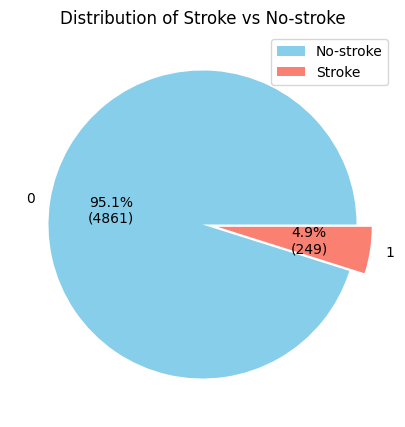

In [8]:
# Count the occurrences of each value in the 'stroke' column
value_counts_strokes = dataset['stroke'].value_counts()

# Create a figure for the pie chart with specified size
plt.figure(figsize=(9, 5))

# Define colors for the pie chart slices
colors = ['skyblue', 'salmon']

# Define the degree of separation between slices, and which slice(s) to explode
explode = (0, 0.1)

# Plot the pie chart with percentage and count labels
value_counts_strokes.plot.pie(
    explode=explode,  # Explode specified slices
    autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(value_counts_strokes) / 100),  # Percentage and count labels
    colors=colors  # Colors for slices
)

# Add legend with labels for the slices
plt.legend(labels=['No-stroke', 'Stroke'], loc="best")

# Set title of the pie chart
plt.title('Distribution of Stroke vs No-stroke')

# Remove y-axis label
plt.ylabel('')

# Display the pie chart
plt.show()

1 indicates that stroke is present


0 indicates stroke is not present

In [9]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Based on the provided information, the dataset encompasses a blend of categorical and numerical attributes.

**Categorical Features:** Gender, Marital Status, Work Type, Residence Type, Smoking Status

**Binary Numerical Features:** Hypertension, Heart Disease, Stroke

**Continuous Numerical Features:** Age, Average Glucose Level, BMI

<Figure size 1000x1000 with 0 Axes>

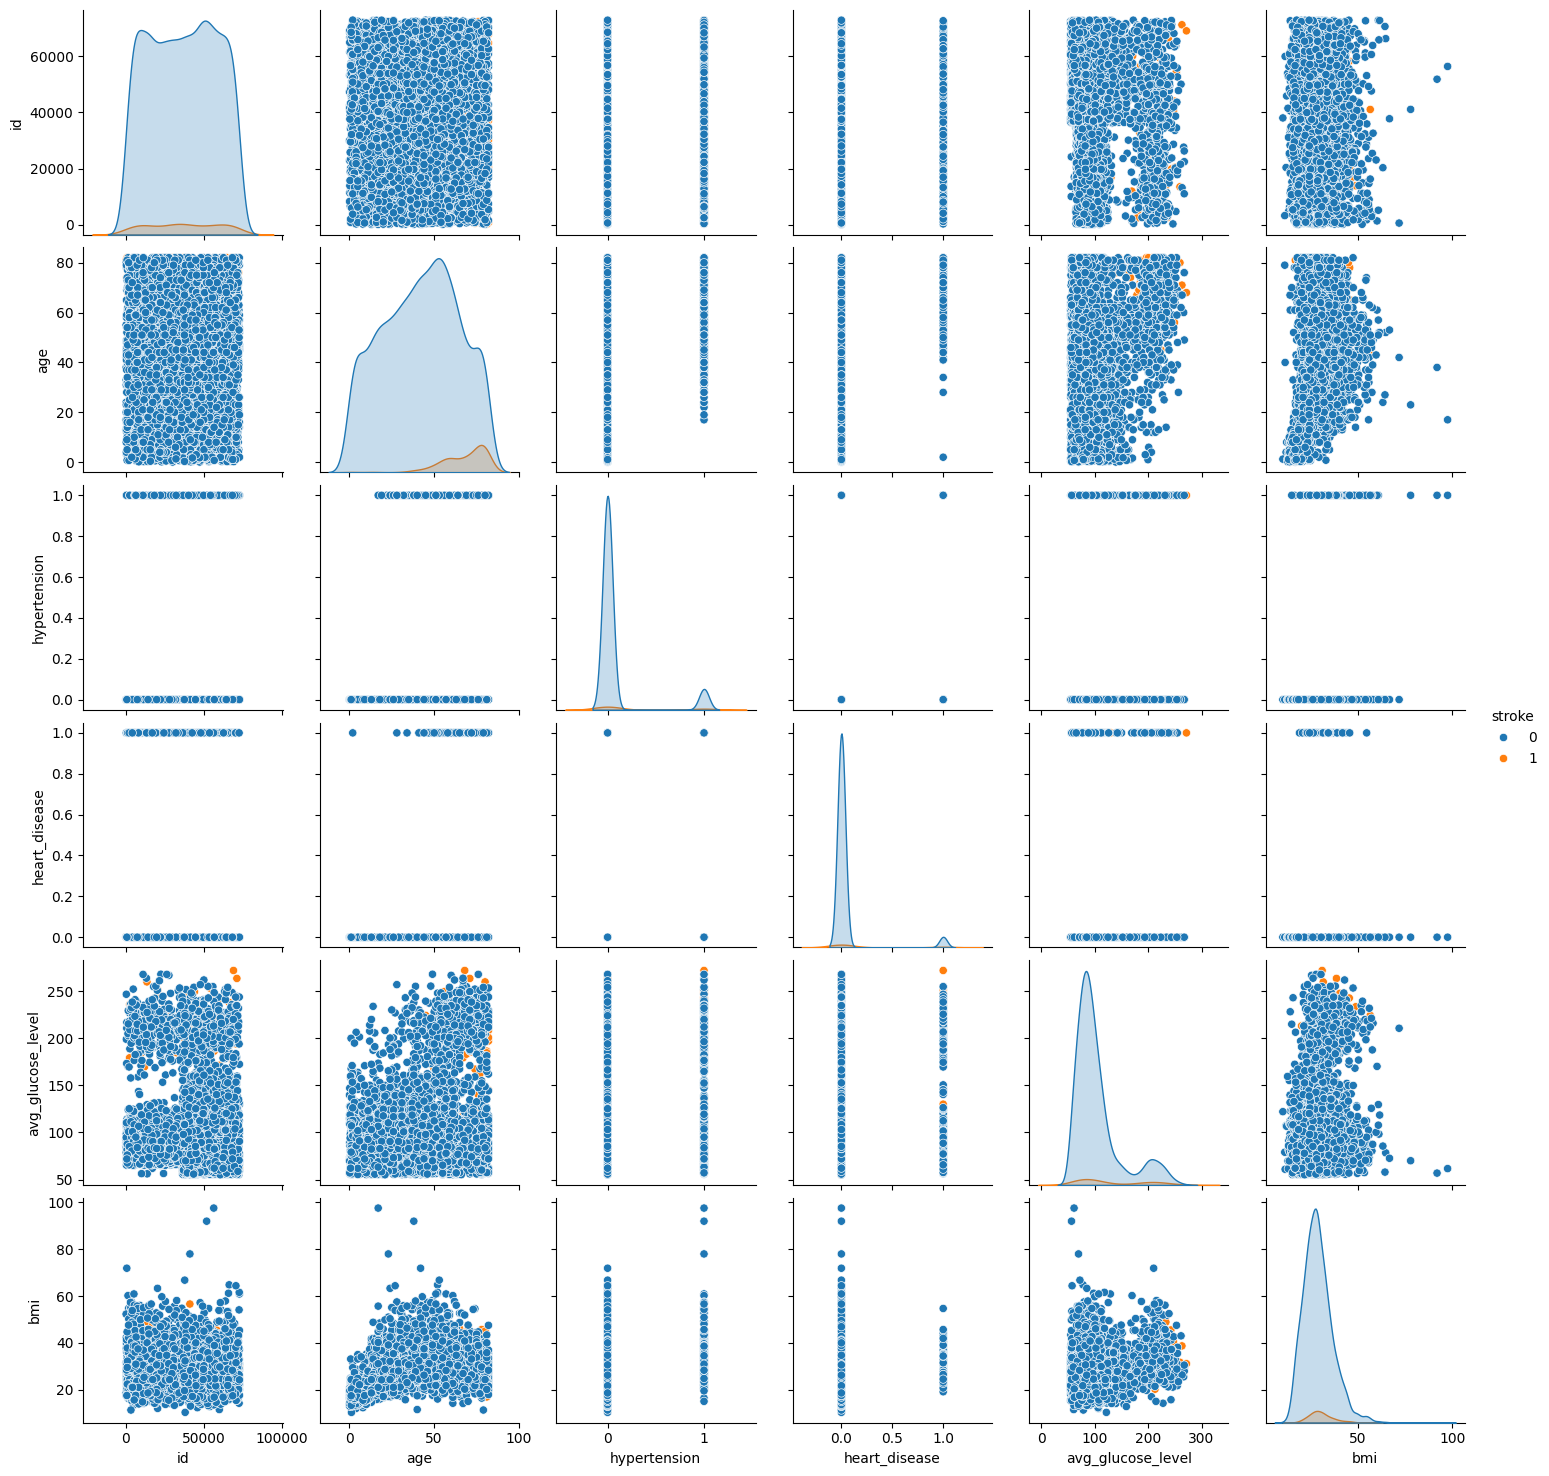

In [11]:
# Create a figure with specified size
plt.figure(figsize=(10, 10))

# Generate a pairplot of the dataset with 'stroke' as hue
sns.pairplot(dataset, hue='stroke')

# Show the plot
plt.show()

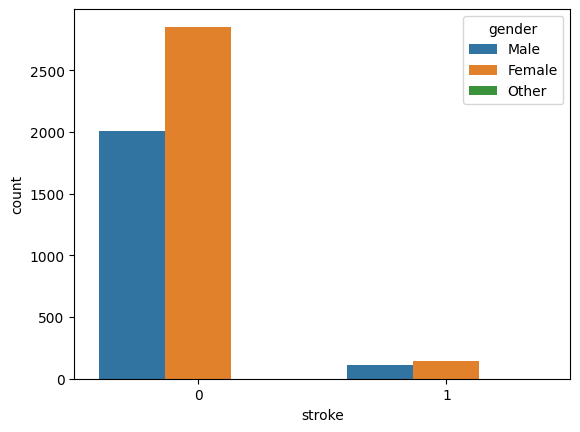

In [12]:
sns.countplot(x='stroke', hue='gender', data=dataset)

plt.show()

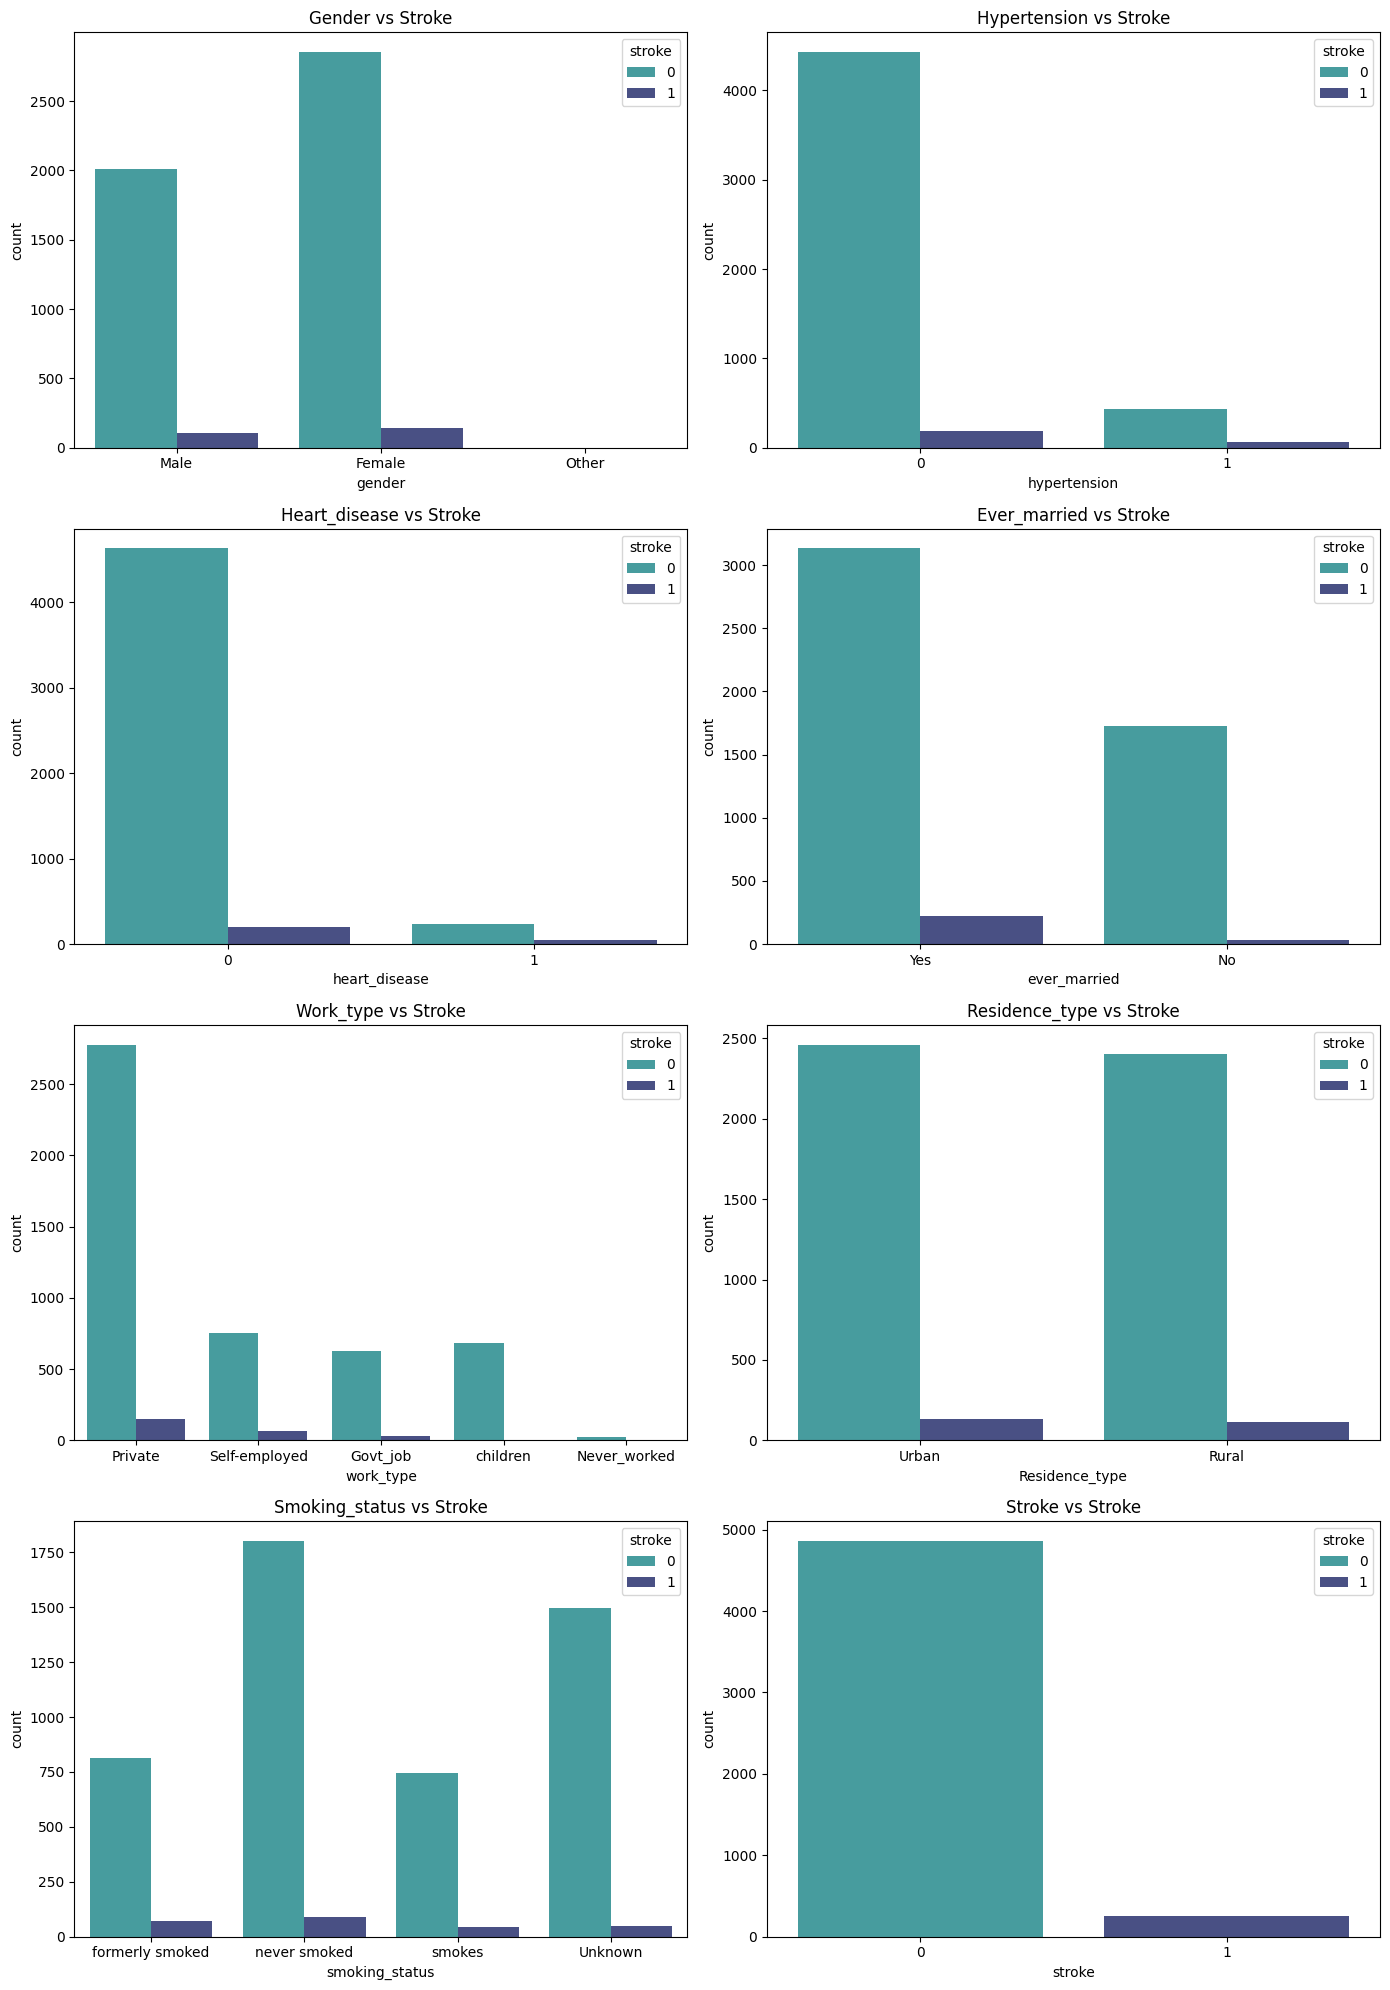

In [13]:
# Define the categorical features to be plotted
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Create subplots with 4 rows and 2 columns, with specified figure size
fig, axs = plt.subplots(4, 2, figsize=(14, 20))

# Iterate over each subplot and corresponding feature
for ax, feature in zip(axs.flatten(), categorical_features):
    # Plot a countplot for the current feature, differentiated by 'stroke' using hue
    sns.countplot(x=feature, data=dataset, ax=ax, hue='stroke', palette='mako_r')

    # Set title for the subplot based on the feature
    ax.set_title(f'{feature.capitalize()} vs Stroke')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

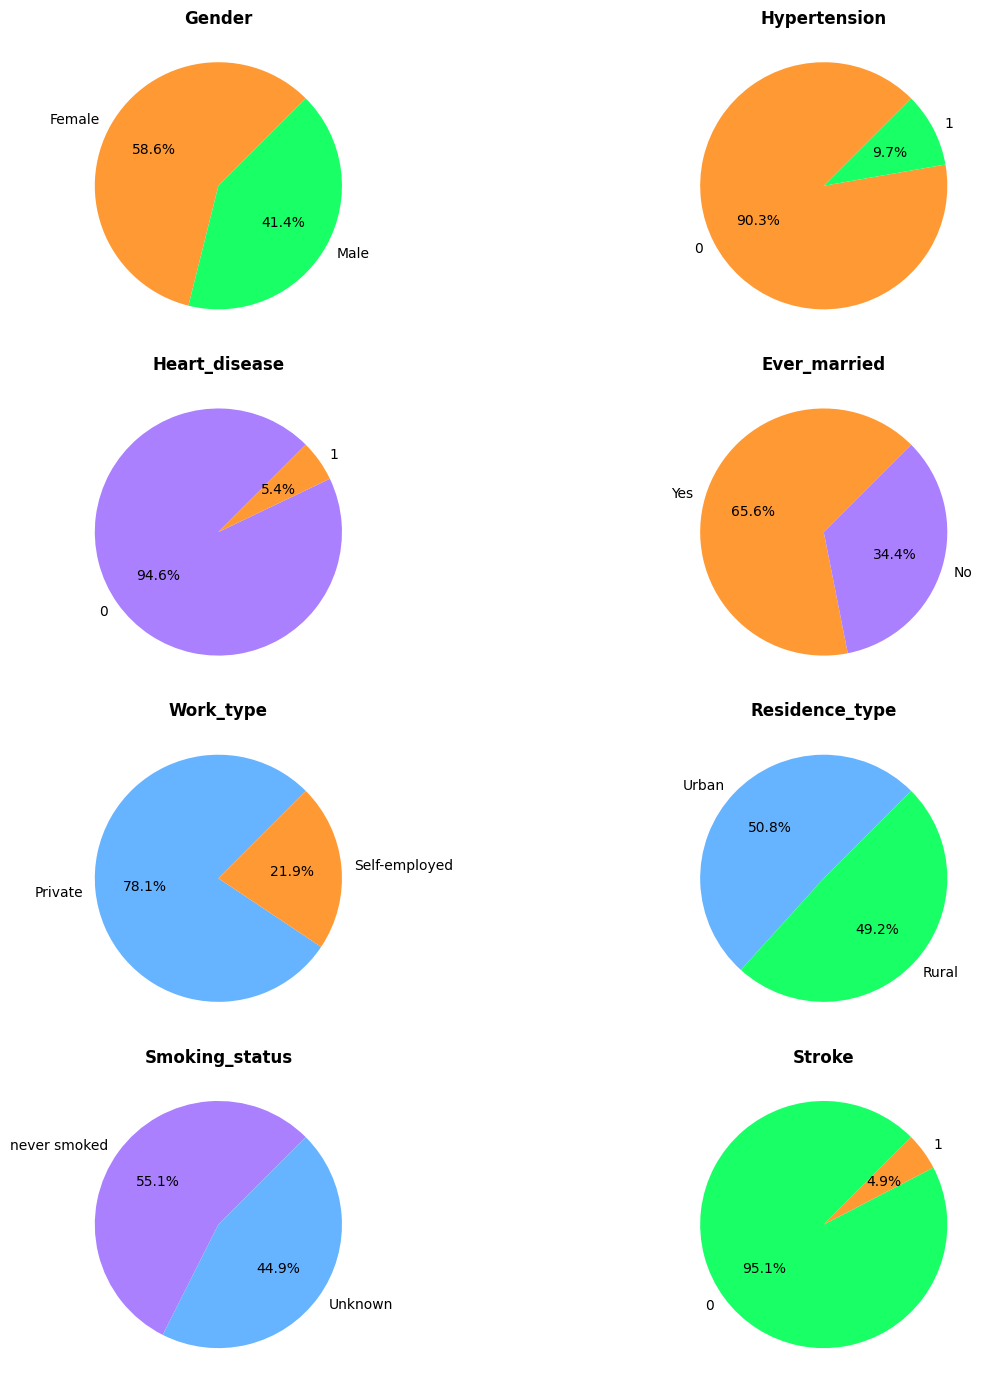

In [14]:
# Create subplots with 4 rows and 2 columns, with specified figure size
fig, axs = plt.subplots(4, 2, figsize=(14, 14))
axs = axs.flatten()

# Define features along with their colors for pie charts
features = [
    ('gender', ['#FF9933', '#19FF66']),  # Example: gender feature with corresponding colors
    ('hypertension', ['#FF9933', '#19FF66']),  # hypertension feature
    ('heart_disease', ['#AA80FF', '#FF9933']),  # heart_disease feature
    ('ever_married', ['#FF9933', '#AA80FF']),  # ever_married feature
    ('work_type', ['#66b3ff', '#FF9933', '#19FF66', '#FF6699', '#000066']),  # work_type feature
    ('Residence_type', ['#66b3ff', '#19FF66']),  # Residence_type feature
    ('smoking_status', ['#AA80FF', '#66b3ff', '#19FF66', '#FF6699']),  # smoking_status feature
    ('stroke', ['#19FF66', '#FF9933'])  # stroke feature
]

# Iterate over each subplot and corresponding feature
for ax, (feature, colors) in zip(axs, features):
    # Get the top 2 categories for the feature
    labels = dataset[feature].value_counts().index.tolist()[:2]
    values = dataset[feature].value_counts().tolist()[:2]

    # Plot pie chart for the current feature with top 2 categories
    ax.pie(x=values, labels=labels, autopct="%1.1f%%", colors=colors, startangle=45)

    # Set title for the subplot based on the feature
    ax.set_title(feature.capitalize(), fontdict={'fontsize': 12}, fontweight='bold')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

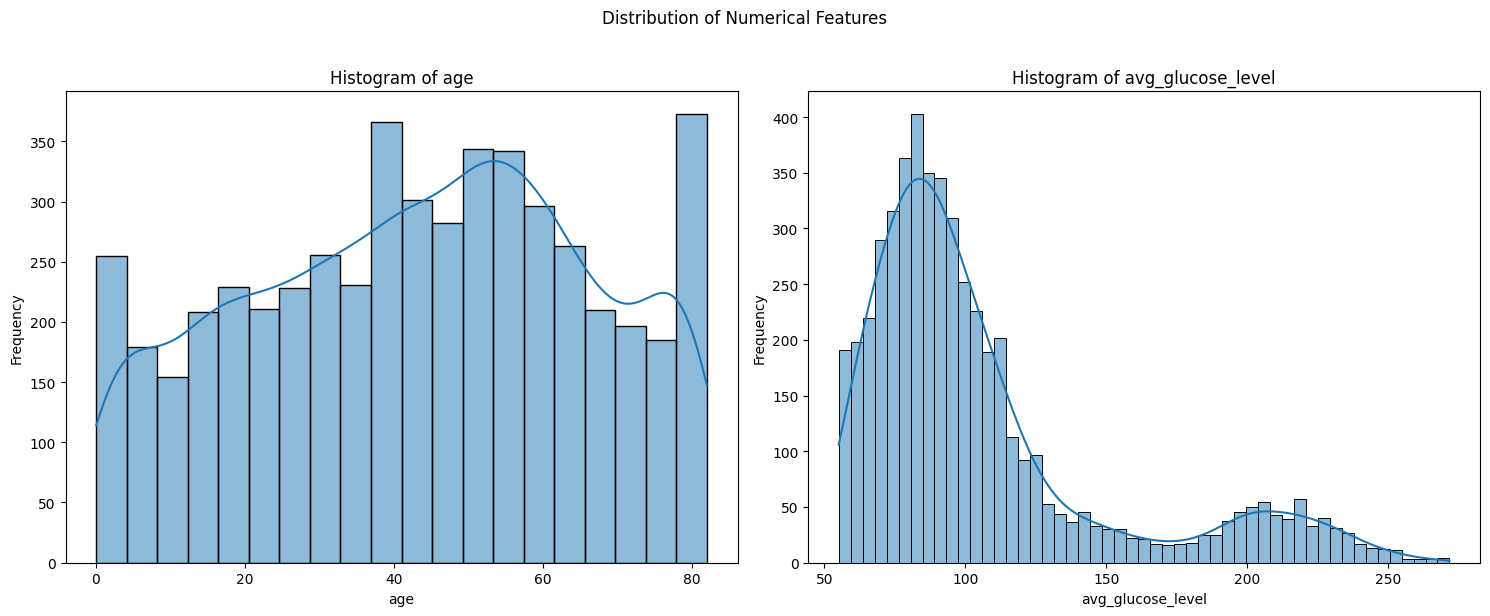

In [15]:
# Extract numerical features
data_num = dataset[['age', 'avg_glucose_level']]

# Plot histograms for numerical features
fig, axes = plt.subplots(1, len(data_num.columns), figsize=(15, 6), dpi=100)

for ax, column in zip(axes, data_num.columns):
    sns.histplot(data_num[column], kde=True, ax=ax)
    ax.set(title=f'Histogram of {column}', xlabel=column, ylabel='Frequency')

# Set main title and adjust layout
fig.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()

# Show plot
plt.show()

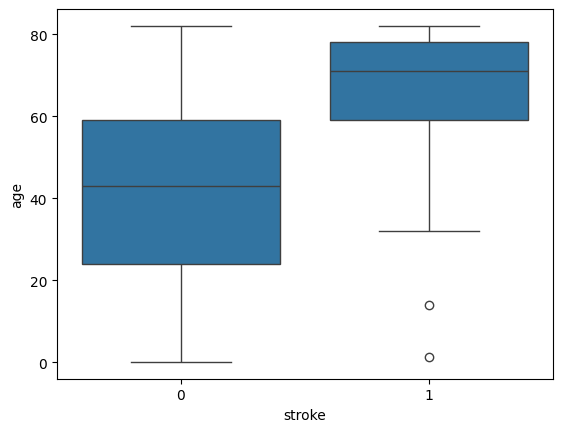

In [16]:
sns.boxplot(data=dataset, y='age', x='stroke')

plt.show()

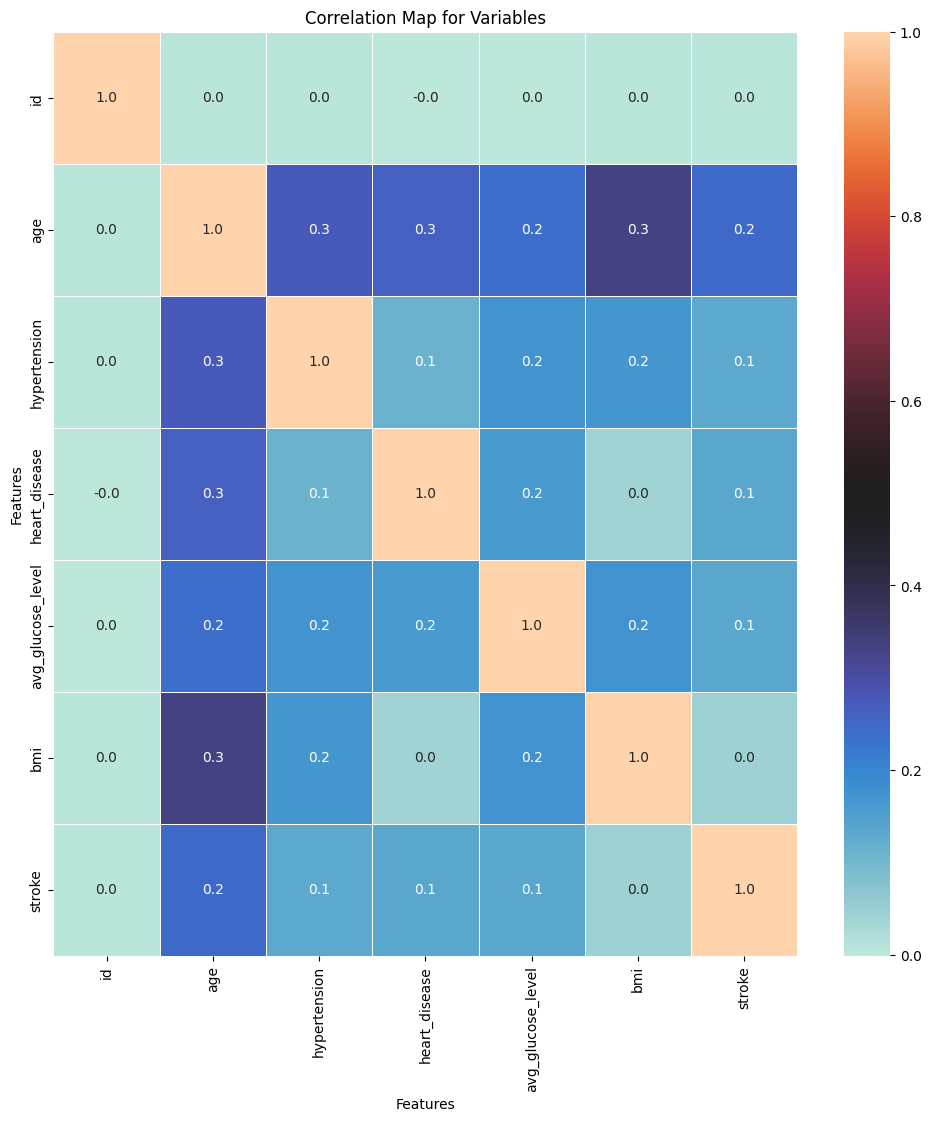

In [17]:
# Create a figure with specified size
plt.figure(figsize=(12, 12))

# Set title for the plot
plt.title('Correlation Map for Variables')

# Generate and display the heatmap of correlations among numerical variables
sns.heatmap(dataset.corr(numeric_only=True), annot=True, linewidths=0.5, fmt='.1f', cmap='icefire')

# Label x-axis
plt.xlabel('Features')

# Label y-axis
plt.ylabel('Features')

# Show the plot
plt.show()

In [18]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [19]:
print("Information about the Dataset:")

dataset.info()

Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [20]:
round(dataset.describe(include='all'), 2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.00,5110,5110.00,5110.0,5110.00,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.83,NaN,43.23,0.1,0.05,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,21161.72,NaN,22.61,0.3,0.23,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,67.00,NaN,0.08,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,17741.25,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.24,23.50,NaN,0.00
50%,36932.00,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,54682.00,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


## Handling Missing Values

In [21]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Found 201 NULL values in bmi column

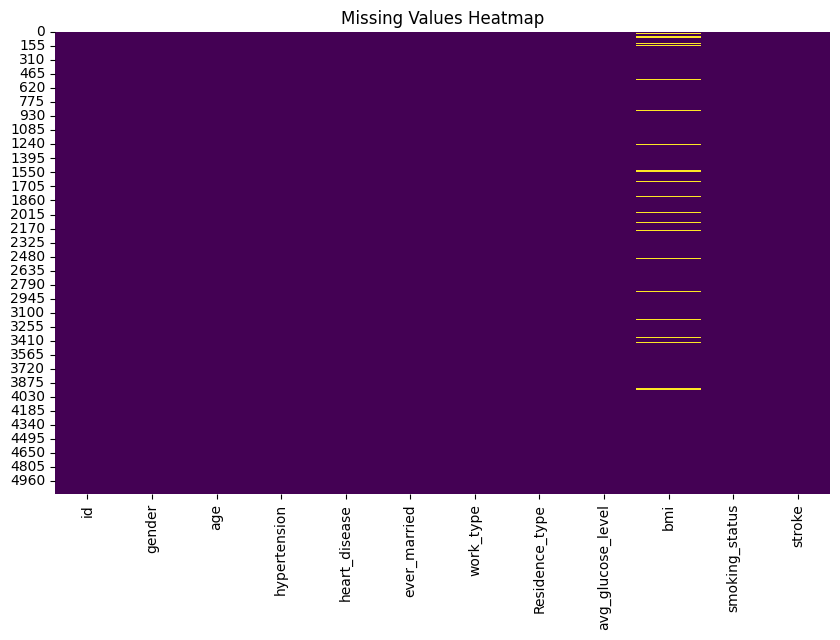

In [22]:
# Create a figure with specified size
plt.figure(figsize=(10, 6))

# Generate a heatmap indicating missing values in the dataset
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')

# Set title for the plot
plt.title("Missing Values Heatmap")

# Show the plot
plt.show()

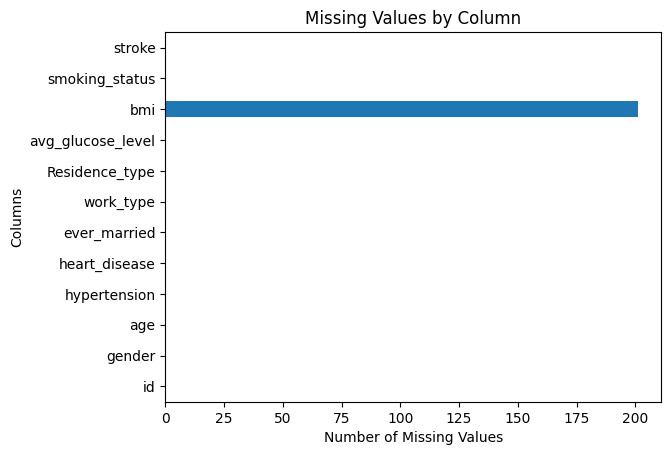

In [23]:
# Calculate the number of missing values for each column
missing_values = dataset.isna().sum()

# Plot a horizontal bar plot
missing_values.plot.barh()

# Set title for the plot
plt.title('Missing Values by Column')

# Label x-axis
plt.xlabel('Number of Missing Values')

# Label y-axis
plt.ylabel('Columns')

# Show the plot
plt.show()

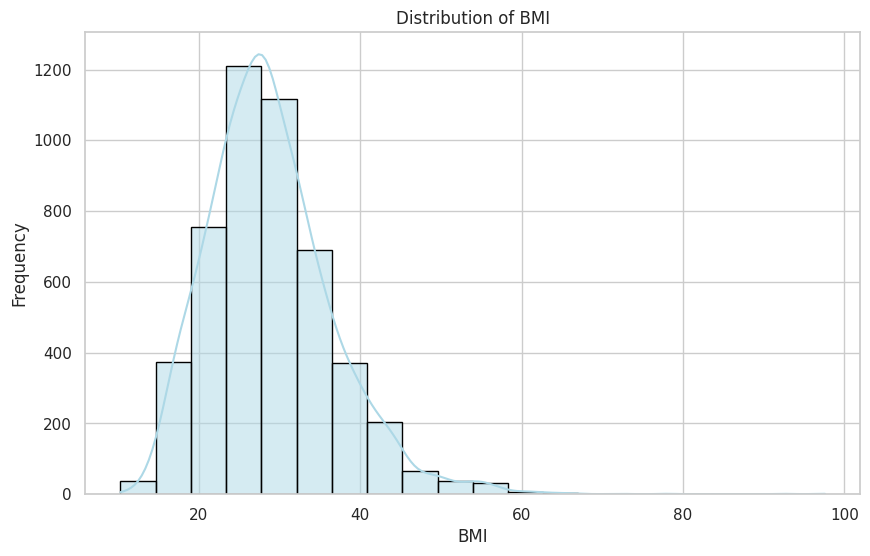

In [24]:
# Set the seaborn style to 'whitegrid'
sns.set(style='whitegrid')

# Create a figure with specified size
plt.figure(figsize=(10, 6))

# Plot a histogram of the 'bmi' variable with specified parameters
sns.histplot(data=dataset['bmi'], bins=20, kde=True, color='lightblue', edgecolor='black')

# Set title for the plot
plt.title('Distribution of BMI')

# Label x-axis
plt.xlabel('BMI')

# Label y-axis
plt.ylabel('Frequency')

# Show the plot
plt.show()

We can see that Bmi is rightly skewed

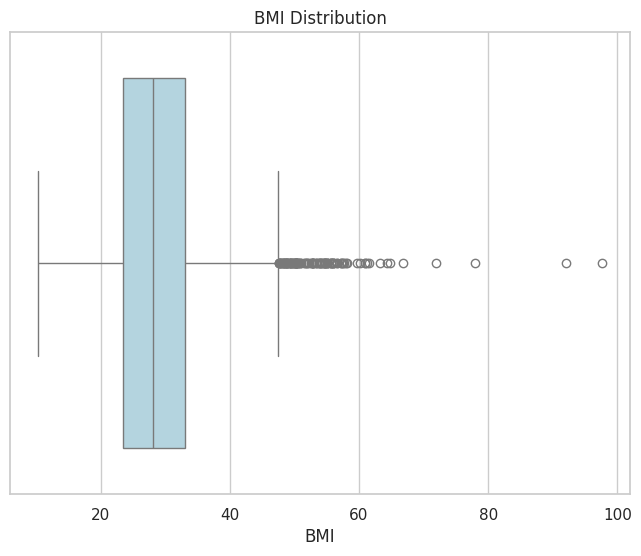

In [25]:
# Set the seaborn style to 'whitegrid'
sns.set(style='whitegrid')

# Create a figure with specified size
plt.figure(figsize=(8, 6))

# Plot a box plot for the 'bmi' variable with specified parameters
sns.boxplot(x=dataset['bmi'], color='lightblue')

# Set title for the plot
plt.title('BMI Distribution')

# Label x-axis
plt.xlabel('BMI')

# Show the plot
plt.show()

Based on the histogram and boxplot we see that there are many outliers in bmi


In [26]:
# Calculate outliers using the interquartile range (IQR) method
outliers_count = dataset['bmi'].apply(lambda x:
    (x < (dataset['bmi'].quantile(0.25) - 1.5 * (dataset['bmi'].quantile(0.75) - dataset['bmi'].quantile(0.25)))) |
    (x > (dataset['bmi'].quantile(0.75) + 1.5 * (dataset['bmi'].quantile(0.75) - dataset['bmi'].quantile(0.25))))
).value_counts()

# Print the count of outliers
print("Count of Outliers:")
print(outliers_count)

Count of Outliers:
bmi
False    5000
True      110
Name: count, dtype: int64


In [27]:
print((dataset.isna().mean() * 100))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [28]:
print(f"Percentage of missing values in the 'bmi' column: {(dataset['bmi'].isna().mean() * 100):.2f}%")

Percentage of missing values in the 'bmi' column: 3.93%


In [29]:
# Count the number of stroke cases where BMI is missing
stroke_with_na_bmi = dataset['stroke'][dataset['bmi'].isnull()].sum()

# Total number of stroke cases
total_stroke_cases = dataset['stroke'].sum()

# Calculate the percentage of stroke cases where BMI is missing compared to the total stroke cases
percentage_stroke_na_bmi = (stroke_with_na_bmi / total_stroke_cases) * 100 if total_stroke_cases != 0 else 0

# Print the statistics
print("People who got a stroke and have NaN BMI:", stroke_with_na_bmi)
print("People who got a stroke and their BMI is given:", total_stroke_cases)
print("Percentage of people with stroke in NaN BMI values to the overall dataset:", percentage_stroke_na_bmi)

People who got a stroke and have NaN BMI: 40
People who got a stroke and their BMI is given: 249
Percentage of people with stroke in NaN BMI values to the overall dataset: 16.06425702811245


In [30]:
print(f"Percentage of instances with stroke: {(dataset['stroke'].mean() * 100):.2f}%")

Percentage of instances with stroke: 4.87%


Our main target function is stroke And the instances who got a stroke is in the minority - 249 Which is only 4.9 % of the instances

In [31]:
# Count the number of missing BMI values where people have had a stroke
missing_bmi_with_stroke = dataset.loc[dataset['bmi'].isnull(), 'stroke'].sum()

# Total number of BMI values where people have had a stroke
overall_bmi_with_stroke = dataset['stroke'].sum()

# Print the statistics
print("Number of NaN BMI values where people have had a stroke:", missing_bmi_with_stroke)
print("Overall number of BMI values where people have had a stroke:", overall_bmi_with_stroke)

Number of NaN BMI values where people have had a stroke: 40
Overall number of BMI values where people have had a stroke: 249



Among the 201 bmi NULL values 40 values in them got stroke

Thus we cant drop NULL values

Since there are outliers present we can’t perform mean imputation as mean is affected by the outliers
    
Hence we impute it with median values



In [32]:
# Calculate the median of the 'bmi' column
median_bmi = dataset['bmi'].median()

# Fill missing values in the 'bmi' column with the calculated median
dataset['bmi'].fillna(median_bmi, inplace=True)

# Print the original and updated median of BMI
print("Original and Updated median of bmi:", median_bmi)

Original and Updated median of bmi: 28.1


In [33]:
print("Summary of Dataset:")

dataset.describe()

Summary of Dataset:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [34]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Hence removed the null values in data ['bmi'] by replacing it with median value.

In [35]:
unique_values = dataset.nunique()

print("Unique values for each column:\n", unique_values)

Unique values for each column:
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


In [36]:
data_types = dataset.dtypes

print(data_types)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [37]:
dataset.drop(columns='id', inplace=True)

In [38]:
dataset.head().iloc[:5]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [39]:
dataset.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [40]:
# Print the distribution of gender before modification
print("Distribution of 'gender' before modification:")
print(dataset['gender'].value_counts())

# Replace 'Other' with 'Male' in the 'gender' column
dataset['gender'].replace('Other', 'Male', inplace=True)

# Print the distribution of gender after modification
print("\nDistribution of 'gender' after modification:")
print(dataset['gender'].value_counts())

Distribution of 'gender' before modification:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Distribution of 'gender' after modification:
gender
Female    2994
Male      2116
Name: count, dtype: int64


Unique Values

- We count number of unique values in each categorical column, to change them with integer values. Here we use .unique() command.

In [41]:
# Create a list of categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

# Iterate through each categorical column and print unique values along with their index
for col in categorical_columns:
    print(f'Column: {col}')
    for index, unique_value in enumerate(dataset[col].unique()):
        print(f'{unique_value}: {index}')
    print('_' * 45)

Column: gender
Male: 0
Female: 1
_____________________________________________
Column: ever_married
Yes: 0
No: 1
_____________________________________________
Column: work_type
Private: 0
Self-employed: 1
Govt_job: 2
children: 3
Never_worked: 4
_____________________________________________
Column: smoking_status
formerly smoked: 0
never smoked: 1
smokes: 2
Unknown: 3
_____________________________________________
Column: Residence_type
Urban: 0
Rural: 1
_____________________________________________


In [42]:
# Define mapping dictionaries for categorical to numerical conversion
mapping = {
    'gender': {'Male': 0, 'Female': 1},
    'ever_married': {'Yes': 0, 'No': 1},
    'work_type': {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4},
    'smoking_status': {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3},
    'Residence_type': {'Urban': 0, 'Rural': 1}
}

# Replace categorical values with numerical values using mapping dictionaries
dataset = dataset.replace(mapping)

In [43]:
# Displaying the first few rows of the dataset for initial exploration
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,1,61.0,0,0,0,1,1,202.21,28.1,1,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1


# Normalization

In [44]:
# Separating features (X) and target variable (y)
X, y = dataset.drop(columns=['stroke']), dataset['stroke']

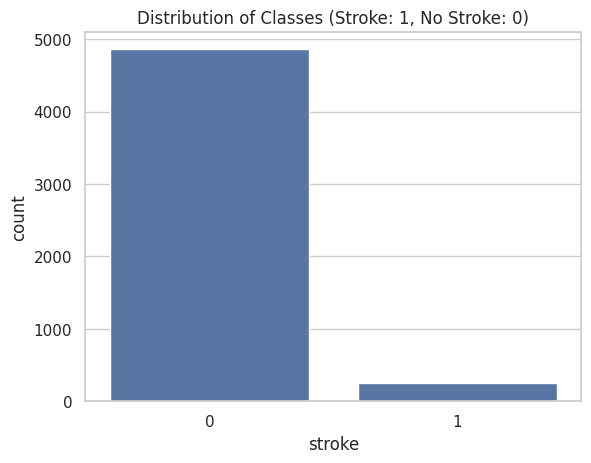

In [45]:
# Visualizing the distribution of the target variable 'stroke' using a count plot
sns.countplot(x='stroke', data=dataset)

# Adding title to the plot
plt.title('Distribution of Classes (Stroke: 1, No Stroke: 0)')

# Displaying the plot
plt.show()

In [46]:
# Displaying the count of samples for each class in the target variable 'y'
print("Number of samples in Class 0:", y.value_counts()[0])
print("Number of samples in Class 1:", y.value_counts()[1])

Number of samples in Class 0: 4861
Number of samples in Class 1: 249


####  It shows that the data is not balanced


## Handling Imbalanced Data

In this dataset, we will employ a technique known as Synthetic Minority Oversampling Technique (SMOTE) for oversampling. SMOTE serves to mitigate overfitting, a common issue when randomly eliminating or replicating data from the minority to the majority class.

Synthetic Sampling represents an advancement over Random Over Sampling, differing primarily in the sampling method employed.

In Synthetic Sampling, a subset of data is extracted from the minority class, from which new synthetic instances resembling the existing data are generated. These synthetic instances are then incorporated into the original dataset. Consequently, Synthetic Sampling involves the creation of new data synthetically rather than mere replication


In [47]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE with a specified random state and fit-resample the data
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, y)

In [48]:
# Counting occurrences of each unique value in the resampled target variable (y_resampled)
class_distribution = dict(zip(*np.unique(y_resampled, return_counts=True)))
class_distribution

{0: 4861, 1: 4861}

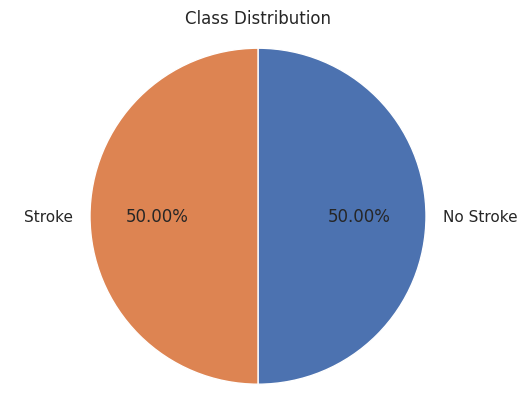

# Samples associated with No Stroke: 4861
# Samples associated with Stroke: 4861


In [49]:
# Counting the occurrences of each class in the resampled target variable
class_counts = np.bincount(y_resampled)

# Class names for pie chart
class_names = ['No Stroke', 'Stroke']

# Plotting a pie chart to visualize the class distribution
plt.pie(class_counts, labels=class_names, autopct='%1.2f%%', startangle=90, counterclock=False)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

# Displaying the number of samples associated with each class
print("# Samples associated with No Stroke: {}".format(class_counts[0]))
print("# Samples associated with Stroke: {}".format(class_counts[1]))

In [50]:
# Splitting the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit the StandardScaler to training data, then transform both training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

### Decision tree

In [52]:
# Importing necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create, train, and predict with Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [53]:
# Importing necessary modules
from sklearn.metrics import classification_report

# Generating and printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1459
           1       0.89      0.93      0.91      1458

    accuracy                           0.91      2917
   macro avg       0.91      0.91      0.90      2917
weighted avg       0.91      0.91      0.90      2917



In [54]:
# Get the classification report
dt_report_dict = classification_report(y_test, y_pred, output_dict=True)

# Assign variables
dt_accuracy = dt_report_dict['accuracy']
dt_precision = dt_report_dict['1']['precision']
dt_recall = dt_report_dict['1']['recall']
dt_f1_score = dt_report_dict['1']['f1-score']

# Print the results
print("Accuracy             : ", dt_accuracy)
print()
print("Precision (Stroke)   : ", dt_precision)
print("Recall    (Stroke)   : ", dt_recall)
print("F1-Score  (Stroke)   : ", dt_f1_score)

Accuracy             :  0.905039424065821

Precision (Stroke)   :  0.8872131147540984
Recall    (Stroke)   :  0.9279835390946503
F1-Score  (Stroke)   :  0.9071404626215219


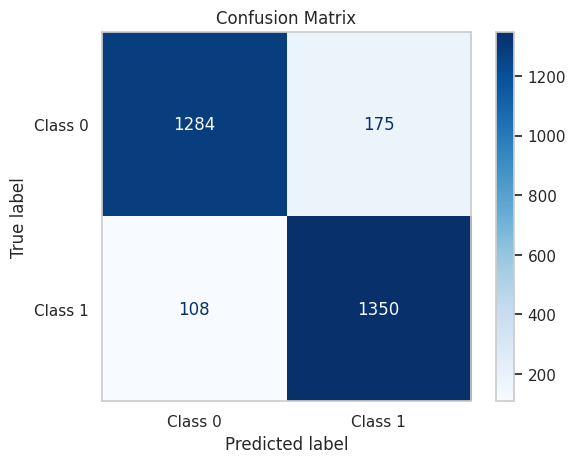

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the classifier object
clf = DecisionTreeClassifier()

# Training the classifier
clf = clf.fit(X_train, y_train)

# Predicting results using the test dataset
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix without lines
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues, values_format=".0f", ax=None)  # Remove lines by setting ax=None
plt.title("Confusion Matrix")
plt.grid(False)  # Ensure no gridlines are present
plt.show()

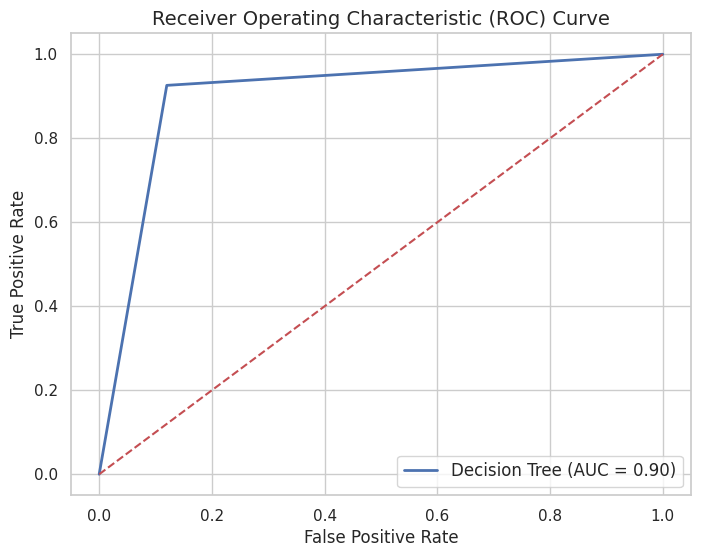

In [56]:
# Calculate the probabilities of the positive class
y_pred_prob_dt = clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dt)

# Calculate the area under the ROC curve
dt_auc_score= roc_auc_score(y_test, y_pred_prob_dt)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, label=f'Decision Tree (AUC = {dt_auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.show()

### kNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
# Create the KNN classifier object with 2 neighbors
knn = KNeighborsClassifier(n_neighbors=2)

# Training the classifier
knn.fit(X_train, y_train)

# Predicting results using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

In [58]:
# Generate and print the classification report for KNN
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1459
           1       0.90      0.95      0.92      1458

    accuracy                           0.92      2917
   macro avg       0.92      0.92      0.92      2917
weighted avg       0.92      0.92      0.92      2917



In [59]:
# Get the classification report
knn_report_dict = classification_report(y_test, y_pred_knn, output_dict=True)

# Assign variables
knn_accuracy = knn_report_dict['accuracy']
knn_precision = knn_report_dict['1']['precision']
knn_recall = knn_report_dict['1']['recall']
knn_f1_score = knn_report_dict['1']['f1-score']

# Print the results
print("Accuracy             : ", knn_accuracy)
print()
print("Precision (Stroke)   : ", knn_precision)
print("Recall    (Stroke)   : ", knn_recall)
print("F1-Score  (Stroke)   : ", knn_f1_score)

Accuracy             :  0.9180665066849503

Precision (Stroke)   :  0.8950097213220998
Recall    (Stroke)   :  0.9471879286694102
F1-Score  (Stroke)   :  0.9203598800399866


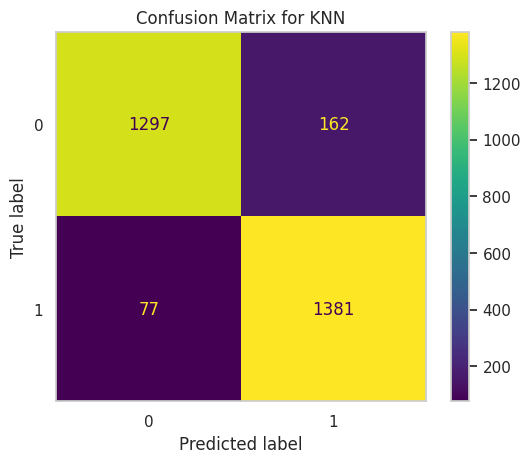

In [60]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix without lines
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1']).plot(ax=None)
plt.title("Confusion Matrix for KNN")
plt.grid(False)  # Ensure no gridlines are present
plt.show()

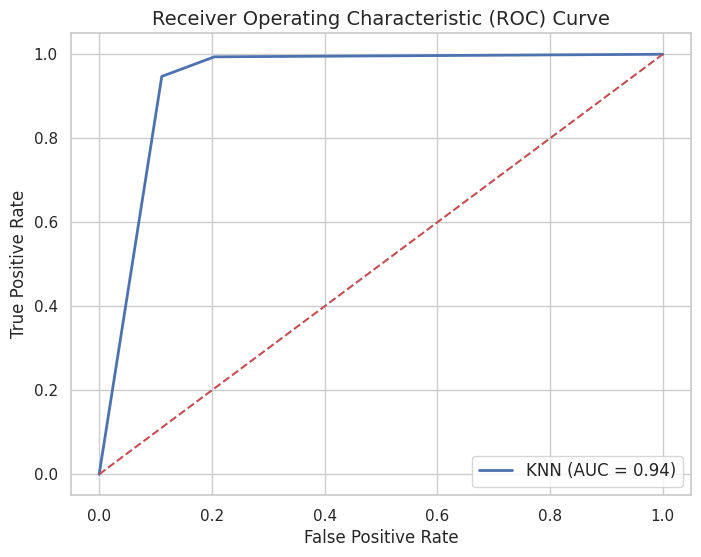

In [61]:
# Calculate the probabilities of the positive class
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)

# Calculate the area under the ROC curve
knn_auc_score = roc_auc_score(y_test, y_pred_prob_knn)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, label=f'KNN (AUC = {knn_auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.show()

### Logistic Regression

In [62]:
# Importing the Logistic Regression module
from sklearn.linear_model import LogisticRegression

# Create the classifier object
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Training the classifier
log_reg.fit(X_train, y_train)

# Predicting results using the test dataset
y_pred_log_reg = log_reg.predict(X_test)
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

In [63]:
# Classification report for Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1459
           1       0.81      0.84      0.82      1458

    accuracy                           0.82      2917
   macro avg       0.82      0.82      0.82      2917
weighted avg       0.82      0.82      0.82      2917



In [64]:
# Get the classification report
lr_report_dict = classification_report(y_test, y_pred_log_reg, output_dict=True)

# Assign variables
lr_accuracy = lr_report_dict['accuracy']
lr_precision = lr_report_dict['1']['precision']
lr_recall = lr_report_dict['1']['recall']
lr_f1_score = lr_report_dict['1']['f1-score']

# Print the results
print("Accuracy             : ", lr_accuracy)
print()
print("Precision (Stroke)   : ", lr_precision)
print("Recall    (Stroke)   : ", lr_recall)
print("F1-Score  (Stroke)   : ", lr_f1_score)

Accuracy             :  0.8203633870414809

Precision (Stroke)   :  0.8072368421052631
Recall    (Stroke)   :  0.8415637860082305
F1-Score  (Stroke)   :  0.8240429818670248


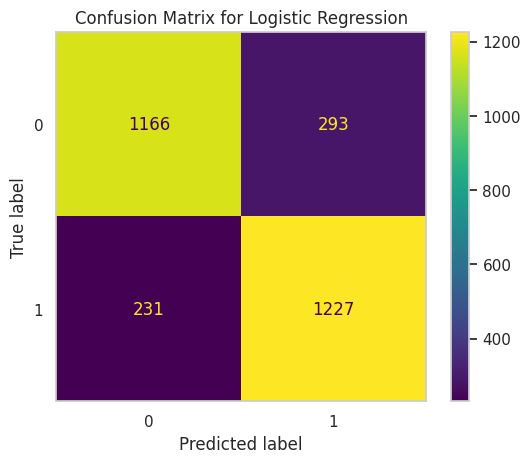

In [65]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cmd_log_reg = ConfusionMatrixDisplay(cm_log_reg, display_labels=['0', '1'])

# Plot without lines
cmd_log_reg.plot(ax=None)  # Remove lines by setting ax=None
plt.grid(False)  # Ensure no gridlines are present
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

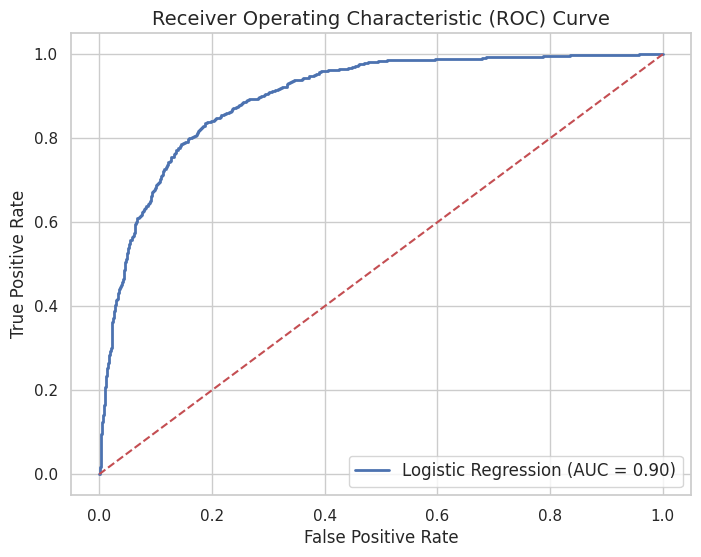

In [66]:
# Plotting the ROC curve
# Calculate the probabilities of the positive class
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_prob_log_reg)

# Calculate the area under the ROC curve
lr_auc_score = roc_auc_score(y_test, y_pred_prob_log_reg)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, linewidth=2, label=f'Logistic Regression (AUC = {lr_auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.show()

### SVM

In [67]:
from sklearn.svm import SVC

# Create the SVM classifier object
svm_clf = SVC(probability=True, random_state=42)  # Set probability=True for ROC curve

# Train the model using the training sets
svm_clf.fit(X_train, y_train)

# Performing predictions on the test dataset
y_pred_svm = svm_clf.predict(X_test)

In [68]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74      1459
           1       0.73      0.81      0.77      1458

    accuracy                           0.75      2917
   macro avg       0.76      0.75      0.75      2917
weighted avg       0.76      0.75      0.75      2917



In [69]:
# Get the classification report
svm_report_dict = classification_report(y_test, y_pred_svm, output_dict=True)

# Assign variables
svm_accuracy = svm_report_dict['accuracy']
svm_precision = svm_report_dict['1']['precision']
svm_recall = svm_report_dict['1']['recall']
svm_f1_score = svm_report_dict['1']['f1-score']

# Print the results
print("Accuracy             : ", svm_accuracy)
print()
print("Precision (Stroke)   : ", svm_precision)
print("Recall    (Stroke)   : ", svm_recall)
print("F1-Score  (Stroke)   : ", svm_f1_score)

Accuracy             :  0.753171066163867

Precision (Stroke)   :  0.7280593325092707
Recall    (Stroke)   :  0.8079561042524005
F1-Score  (Stroke)   :  0.7659297789336801


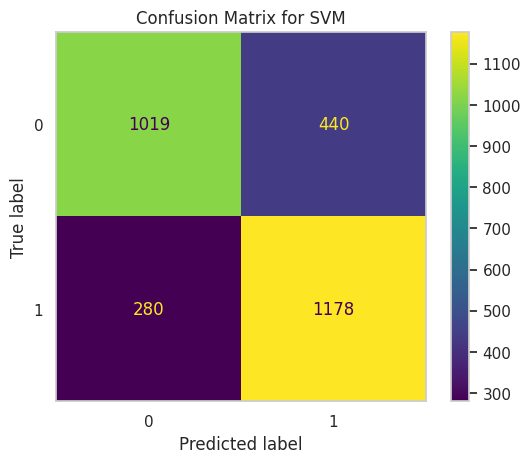

In [70]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(ax=None)  # Remove lines by setting ax=None
plt.grid(False)  # Ensure no gridlines are present
plt.title("Confusion Matrix for SVM")
plt.show()

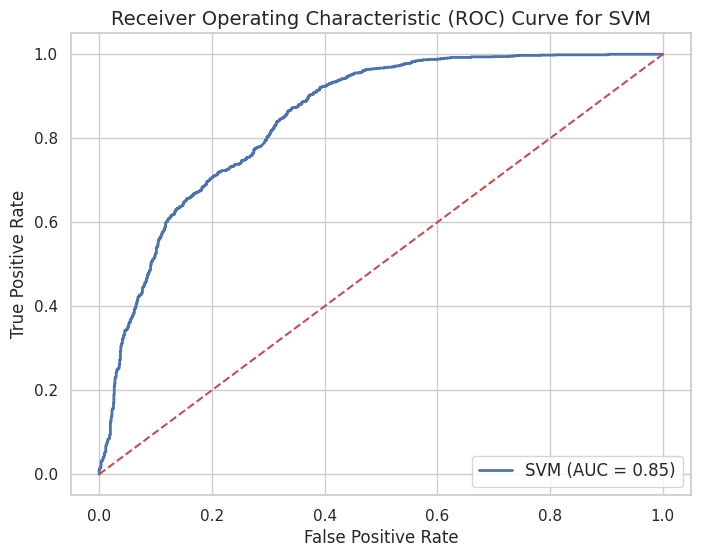

In [71]:
# Assuming svm_clf is your SVM classifier
# Predict probabilities on the test set
y_pred_prob_svm = svm_clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate using the actual labels (y_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)

# Calculate the area under the ROC curve
svm_auc_score = roc_auc_score(y_test, y_pred_prob_svm)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, linewidth=2, label=f'SVM (AUC = {svm_auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.show()

### Random Forest

In [72]:
# importing random forest classifier module for training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100,random_state=42)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

In [73]:
# Get the classification report
rf_classification_report = classification_report(y_test, y_pred_rf)

# Print the classification report
print(rf_classification_report)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1459
           1       0.92      0.96      0.94      1458

    accuracy                           0.94      2917
   macro avg       0.94      0.94      0.94      2917
weighted avg       0.94      0.94      0.94      2917



In [74]:
# Get the classification report
rf_report_dict = classification_report(y_test, y_pred_rf, output_dict=True)

# Assign variables
rf_accuracy = rf_report_dict['accuracy']
rf_precision = rf_report_dict['1']['precision']
rf_recall = rf_report_dict['1']['recall']
rf_f1_score = rf_report_dict['1']['f1-score']

# Print the results
print("Accuracy             : ", rf_accuracy)
print()
print("Precision (Stroke)   : ", rf_precision)
print("Recall    (Stroke)   : ", rf_recall)
print("F1-Score  (Stroke)   : ", rf_f1_score)

Accuracy             :  0.9358930407953376

Precision (Stroke)   :  0.9150881776616591
Recall    (Stroke)   :  0.9609053497942387
F1-Score  (Stroke)   :  0.9374372699899631


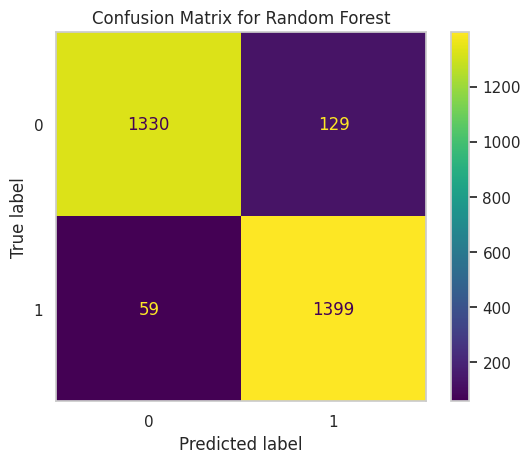

In [75]:
# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# Performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix without lines
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=None)  # Remove lines by setting ax=None

# Customize plot
plt.grid(False)  # Ensure no gridlines are present
plt.title("Confusion Matrix for Random Forest")  # Set title
plt.show()  # Display the plot

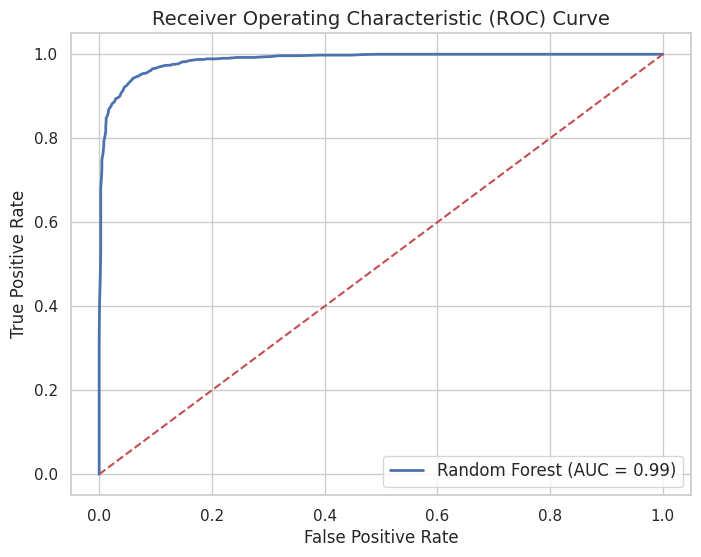

In [76]:
# import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for the test dataset
y_pred_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
rf_auc_score = roc_auc_score(y_test, y_pred_prob_rf)

# plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, label=f'Random Forest (AUC = {rf_auc_score:.2f})')  # Plot the ROC curve
plt.plot([0, 1], [0, 1], 'r--')  # Plot the diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)  # Set the title of the plot
plt.xlabel('False Positive Rate', fontsize=12)  # Label x-axis
plt.ylabel('True Positive Rate', fontsize=12)  # Label y-axis
plt.legend(loc='lower right', fontsize=12)  # Add legend to the plot
plt.show()  # Display the plot

In [77]:
# Summary of all the models

performance_comparision = pd.DataFrame({
    "Classifier" : ["Decision Tree","KNN","Logistic Regression","SVM","Random Forest"],
    "Accuracy ( Overall )" : [dt_accuracy,knn_accuracy,lr_accuracy,svm_accuracy,rf_accuracy],
    "Precision ( Stroke )" : [dt_precision,knn_precision,lr_precision,svm_precision,rf_precision],
    "Recall ( Stroke )" : [dt_recall,knn_recall,lr_recall,svm_recall,rf_recall],
    "F1-Score ( Stroke )" : [dt_f1_score,knn_f1_score,lr_f1_score,svm_f1_score,rf_f1_score],
    "AUC" : [dt_auc_score,knn_auc_score,lr_auc_score,svm_auc_score,rf_auc_score]
})

# performance_comparision = performance_comparision.sort_values(by=["Accuracy ( Overall )"], ascending=False)
# performance_comparision.index = np.arange(1, len(performance_comparision) + 1)
performance_comparision

,Classifier,Accuracy ( Overall ),Precision ( Stroke ),Recall ( Stroke ),F1-Score ( Stroke ),AUC
0,Decision Tree,0.905039,0.887213,0.927984,0.907140,0.902990
1,KNN,0.918067,0.895010,0.947188,0.920360,0.936345
2,Logistic Regression,0.820363,0.807237,0.841564,0.824043,0.899795
3,SVM,0.753171,0.728059,0.807956,0.765930,0.847944
4,Random Forest,0.935893,0.915088,0.960905,0.937437,0.986532


Overall Random Forest is the best fitted model

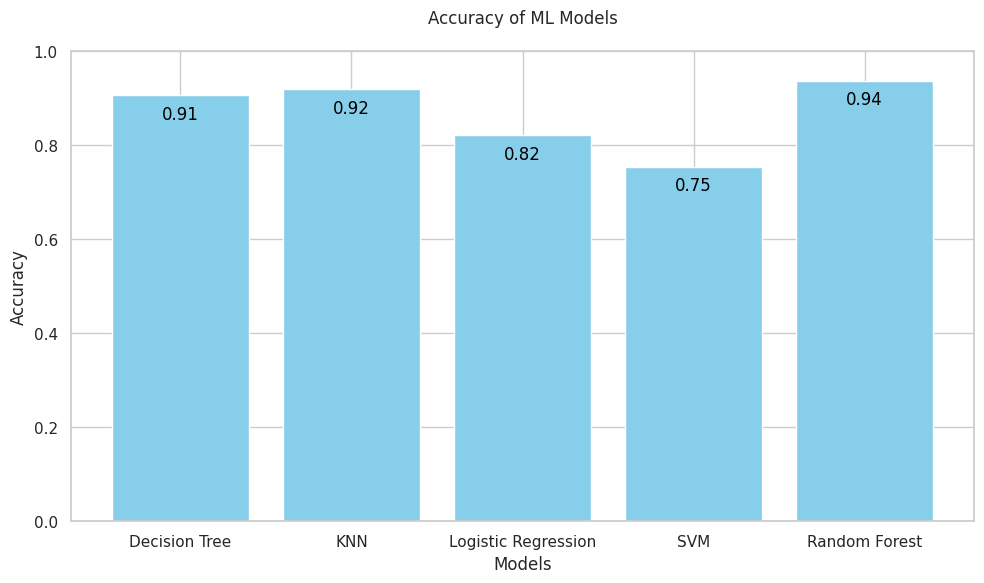

In [78]:
# Data
models = ['Decision Tree', 'KNN', 'Logistic Regression', 'SVM', 'Random Forest']
accuracies = [dt_accuracy, knn_accuracy, lr_accuracy, svm_accuracy, rf_accuracy]

# Plot
plt.figure(figsize=(10, 6))  # Set the figure size
bars = plt.bar(models, accuracies, color='skyblue')  # Create the bar chart
plt.title('Accuracy of ML Models', pad=20)  # Set the title of the plot
plt.xlabel('Models')  # Set the label for the x-axis
plt.ylabel('Accuracy')  # Set the label for the y-axis
plt.ylim(0, 1)  # Set the y-axis limit

# Data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05,
             f'{bar.get_height():.2f}', ha='center', color='black')  # Add text labels to each bar

plt.xticks(rotation=0)  # Rotate the x-axis labels to avoid overlap
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

# Feature Importance

<Axes: title={'center': 'Feature Importance'}>

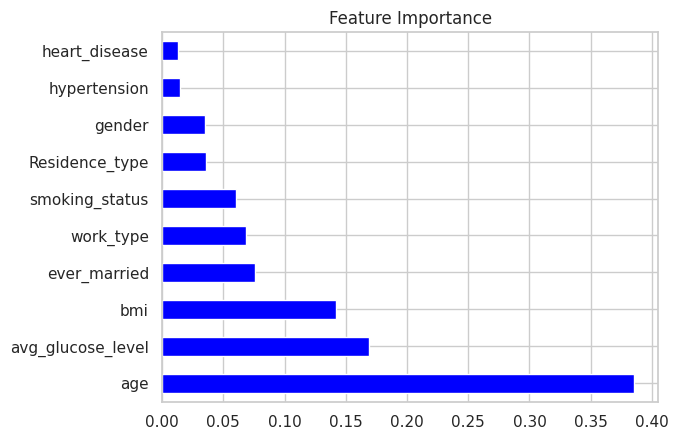

In [80]:
# Plot feature importance
(pd.Series(rf_clf.feature_importances_, index=dataset.columns[:-1])  # Calculate feature importance using Random Forest classifier
 .nlargest(10)  # Select the top 10 most important features
 .plot(kind="barh", colormap="winter", title="Feature Importance"))  # Plot the feature importance as a horizontal bar chart using a winter colormap

# Conclusion

Random Forest seems to be the best-performing model for this particular classification task. It provides a good balance between accuracy, precision, recall, F1-score, and AUC, making it a reliable choice for predicting strokes in your dataset.

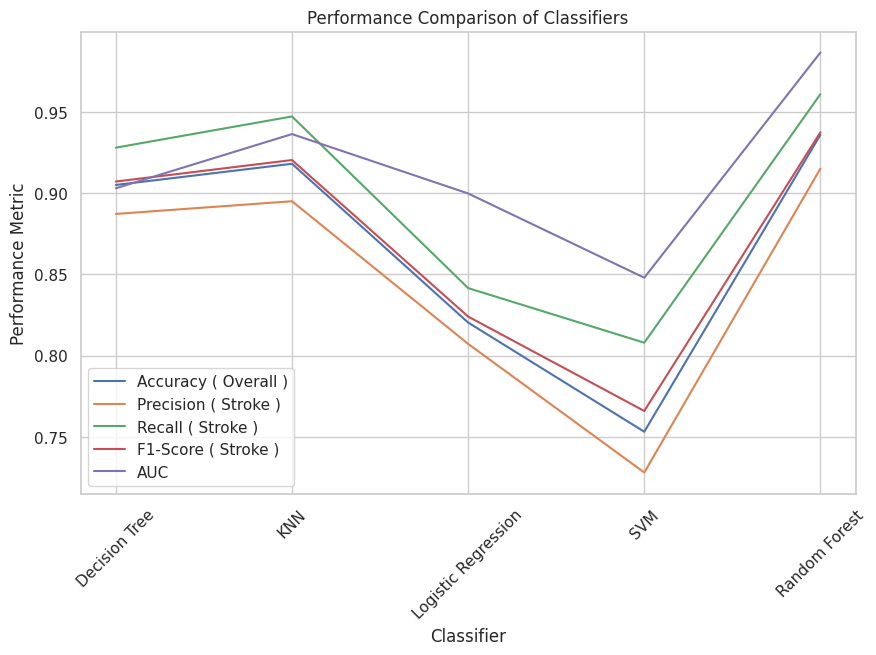

In [81]:
# Get the data
classifiers = performance_comparision['Classifier'].tolist()  # Extract list of classifiers
metrics = ['Accuracy ( Overall )', 'Precision ( Stroke )', 'Recall ( Stroke )', 'F1-Score ( Stroke )', 'AUC']  # Define list of metrics
data = [performance_comparision[metric].tolist() for metric in metrics]  # Extract data for each metric

# Create line plots for each metric
plt.figure(figsize=(10, 6))  # Set figure size
for metric_data in data:
    plt.plot(classifiers, metric_data)  # Plot each metric data against classifiers

# Labels and title
plt.xlabel('Classifier')  # X-axis label
plt.ylabel('Performance Metric')  # Y-axis label
plt.title('Performance Comparison of Classifiers')  # Plot title
plt.legend(metrics)  # Add legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Show grid
plt.show()  # Display plot

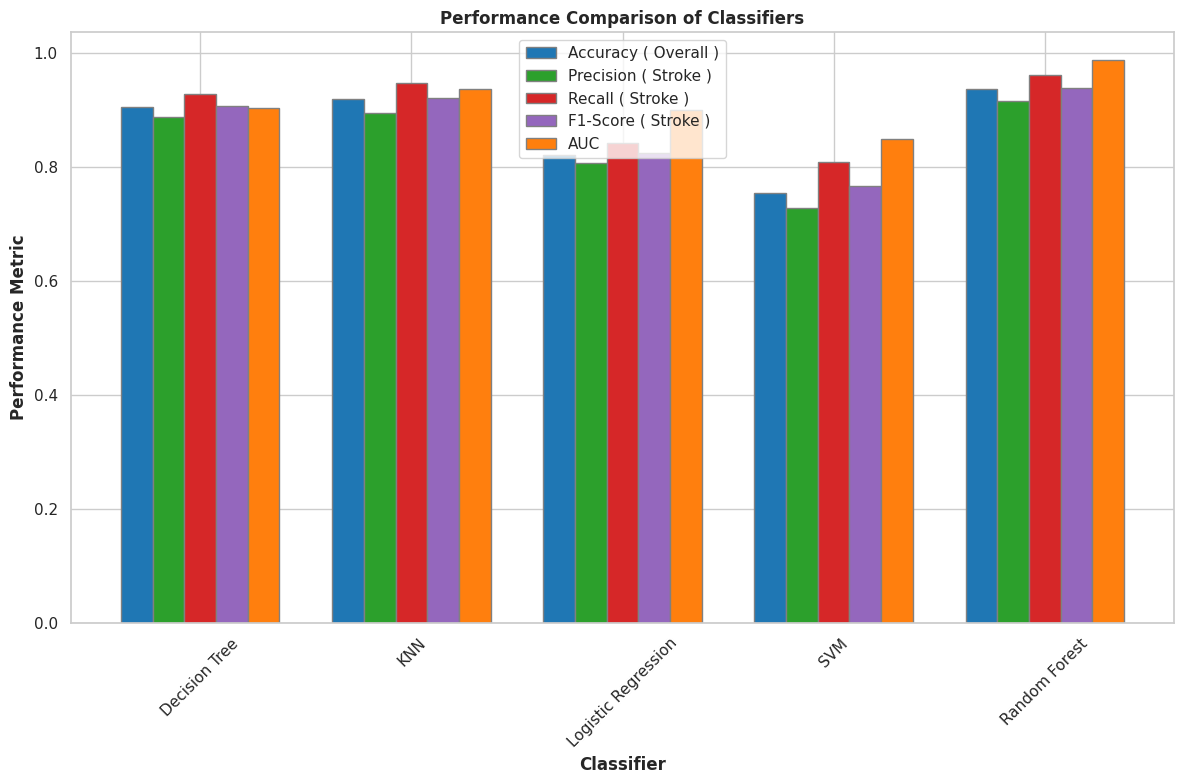

In [82]:
# Get the data
classifiers = performance_comparision['Classifier']  # Extracting classifier names
metrics = ['Accuracy ( Overall )', 'Precision ( Stroke )', 'Recall ( Stroke )', 'F1-Score ( Stroke )', 'AUC']  # List of performance metrics
data = [performance_comparision[metric] for metric in metrics]  # Extracting performance data for each metric

# Set the width of the bars
bar_width = 0.15

# Set position of bar on X axis
r = np.arange(len(classifiers))  # Generating evenly spaced values for x-axis

# Define colors for each metric
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e']  # Colors for the bars

# Create the bar chart
plt.figure(figsize=(12, 8))
for i, metric_data in enumerate(data):
    plt.bar(r + i * bar_width, metric_data, color=colors[i], width=bar_width, edgecolor='grey', label=metrics[i])  # Plotting bars for each metric

# Add xticks on the middle of the group bars
plt.xlabel('Classifier', fontweight='bold')  # Label for x-axis
plt.ylabel('Performance Metric', fontweight='bold')  # Label for y-axis
plt.xticks(r + 2 * bar_width, classifiers, rotation=45)  # Setting x-axis ticks with classifier names, rotating labels for better readability
plt.title('Performance Comparison of Classifiers', fontweight='bold')  # Title of the plot
plt.legend()  # Adding legend
plt.grid(True)  # Adding grid
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show graphic
plt.show()

## Checking for random inputs

In [84]:
# Collect input data from the user
input_features = [
    int(input("Enter gender of person:")),  # Gender
    float(input("Enter age of person:")),   # Age
    int(input("Enter hypertension:")),      # Hypertension
    int(input("Enter heart disease:")),     # Heart disease
    int(input("Enter ever married:")),       # Marital status
    int(input("Enter work type:")),          # Work type
    int(input("Enter residence type:")),     # Residence type
    float(input("Enter average glucose level:")),  # Average glucose level
    float(input("Enter BMI:")),             # Body Mass Index
    int(input("Enter smoking status:"))      # Smoking status
]

# Predict using the trained model
pred = rf_clf.predict([input_features])

# Print the prediction
if pred == 1:
    print("Person may have a brain stroke")
else:
    print("Person has good health")

Enter gender of person:0
Enter age of person:67
Enter hypertension:0
Enter heart disease:1
Enter ever married:0
Enter work type:0
Enter residence type:0
Enter average glucose level:228
Enter BMI:36
Enter smoking status:0
Person may have a brain stroke


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [86]:
# Collect input data from the user
input_features = [
    int(input("Enter gender of person:")),  # Gender
    float(input("Enter age of person:")),   # Age
    int(input("Enter hypertension:")),      # Hypertension
    int(input("Enter heart disease:")),     # Heart disease
    int(input("Enter ever married:")),       # Marital status
    int(input("Enter work type:")),          # Work type
    int(input("Enter residence type:")),     # Residence type
    float(input("Enter average glucose level:")),  # Average glucose level
    float(input("Enter BMI:")),             # Body Mass Index
    int(input("Enter smoking status:"))      # Smoking status
]

# Predict using the trained model
pred = rf_clf.predict([input_features])

# Print the prediction
if pred == 1:
    print("Person may have a brain stroke")
else:
    print("Person has good health")

Enter gender of person:1
Enter age of person:44
Enter hypertension:0
Enter heart disease:0
Enter ever married:0
Enter work type:2
Enter residence type:0
Enter average glucose level:85
Enter BMI:26
Enter smoking status:3
Person has good health


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
